In [231]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

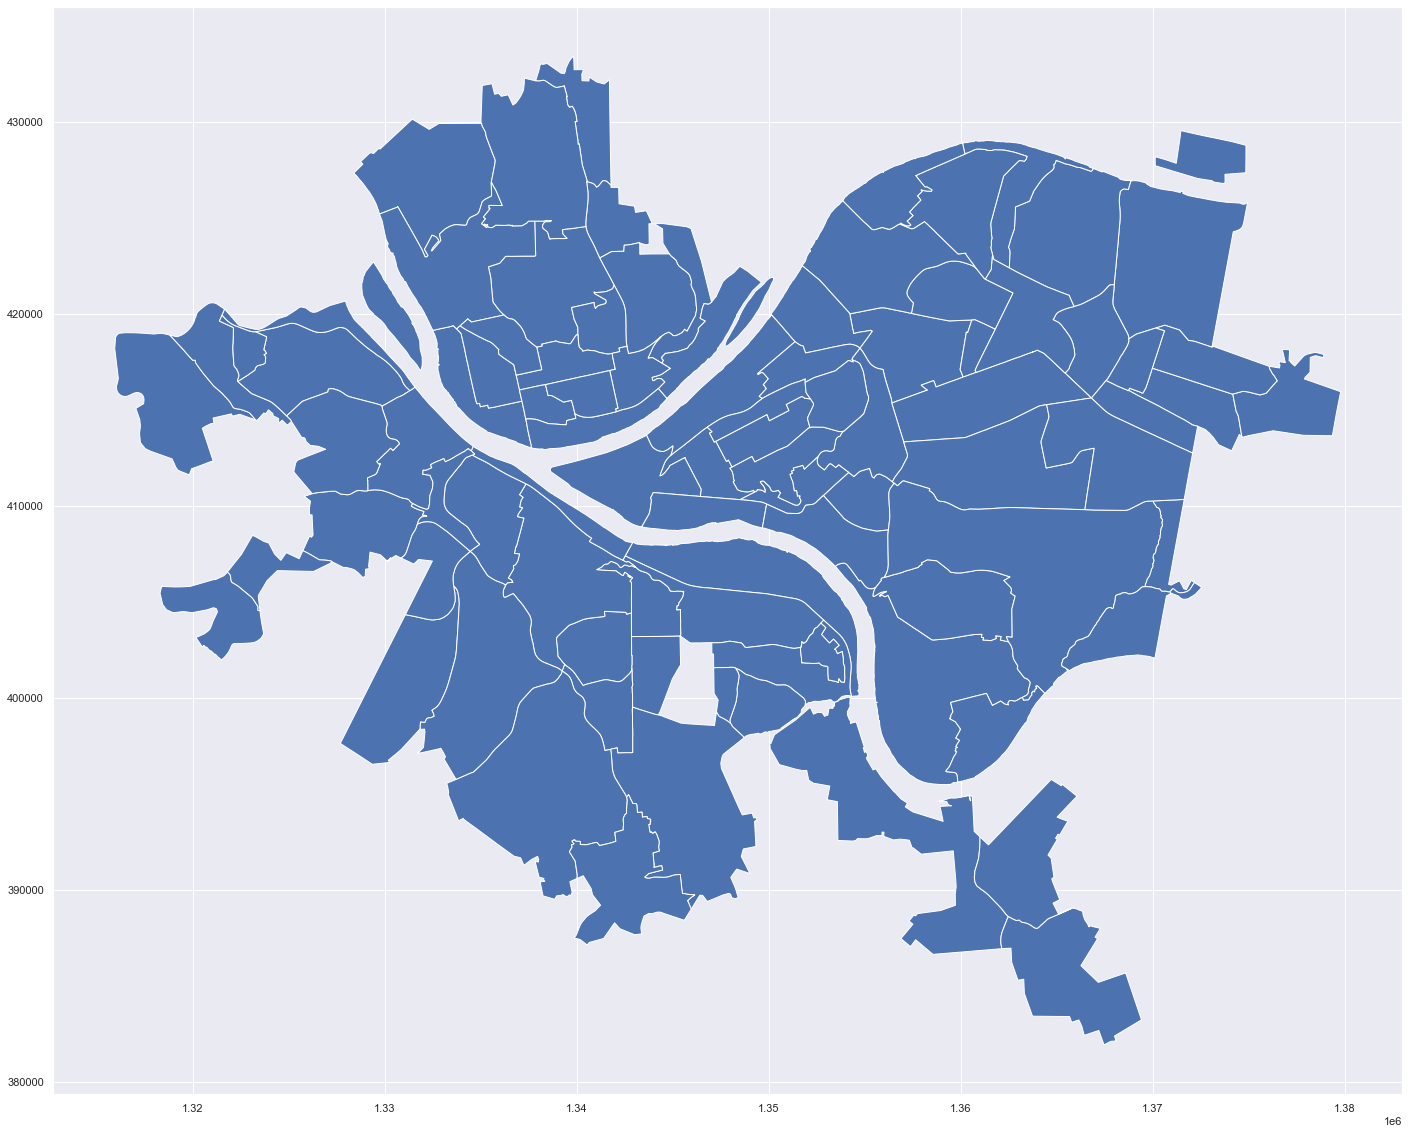

In [293]:
nb = 'Neighborhoods/Neighborhoods_.shp'
regions = gpd.read_file(nb)

neighborhoods = pd.read_csv("Neighborhoods_.csv")
data = pd.read_csv("4_Where_data.csv")

names = []
counts = []
for i in range(0,len(regions['geoid10'])):
    geoid = regions["geoid10"][i]
    if type(geoid) == str:
        item = neighborhoods.loc[neighborhoods['geoid10']==geoid,"hood"]
        n = item[i]
        names.append(n)
        
        count = data.loc[data["Name"] == n, "Unique Values"].values
        try:
            count = list(count)
            counts.append(count[0])
        except:
            counts.append(-1)

    else:
        names.append(None)
        counts.append(None)

regions.sample(5)

regions.insert(len(regions.columns), "neighborhood", names, allow_duplicates=False)
regions.insert(len(regions.columns), "count", counts, allow_duplicates=False)

regions.plot(figsize=(40,20))
plt.show()

In [294]:
regions["neighborhood"]

0                   Chateau
1               Summer Hill
2         Northview Heights
3     Spring Hill-City View
4               Perry South
              ...          
85                Overbrook
86           Chartiers City
87                   Esplen
88                Ridgemont
89                 West End
Name: neighborhood, Length: 90, dtype: object

In [295]:
regions["count"]

0     164.0
1      10.0
2     122.0
3     215.0
4     327.0
      ...  
85     59.0
86     22.0
87     97.0
88     14.0
89    121.0
Name: count, Length: 90, dtype: float64

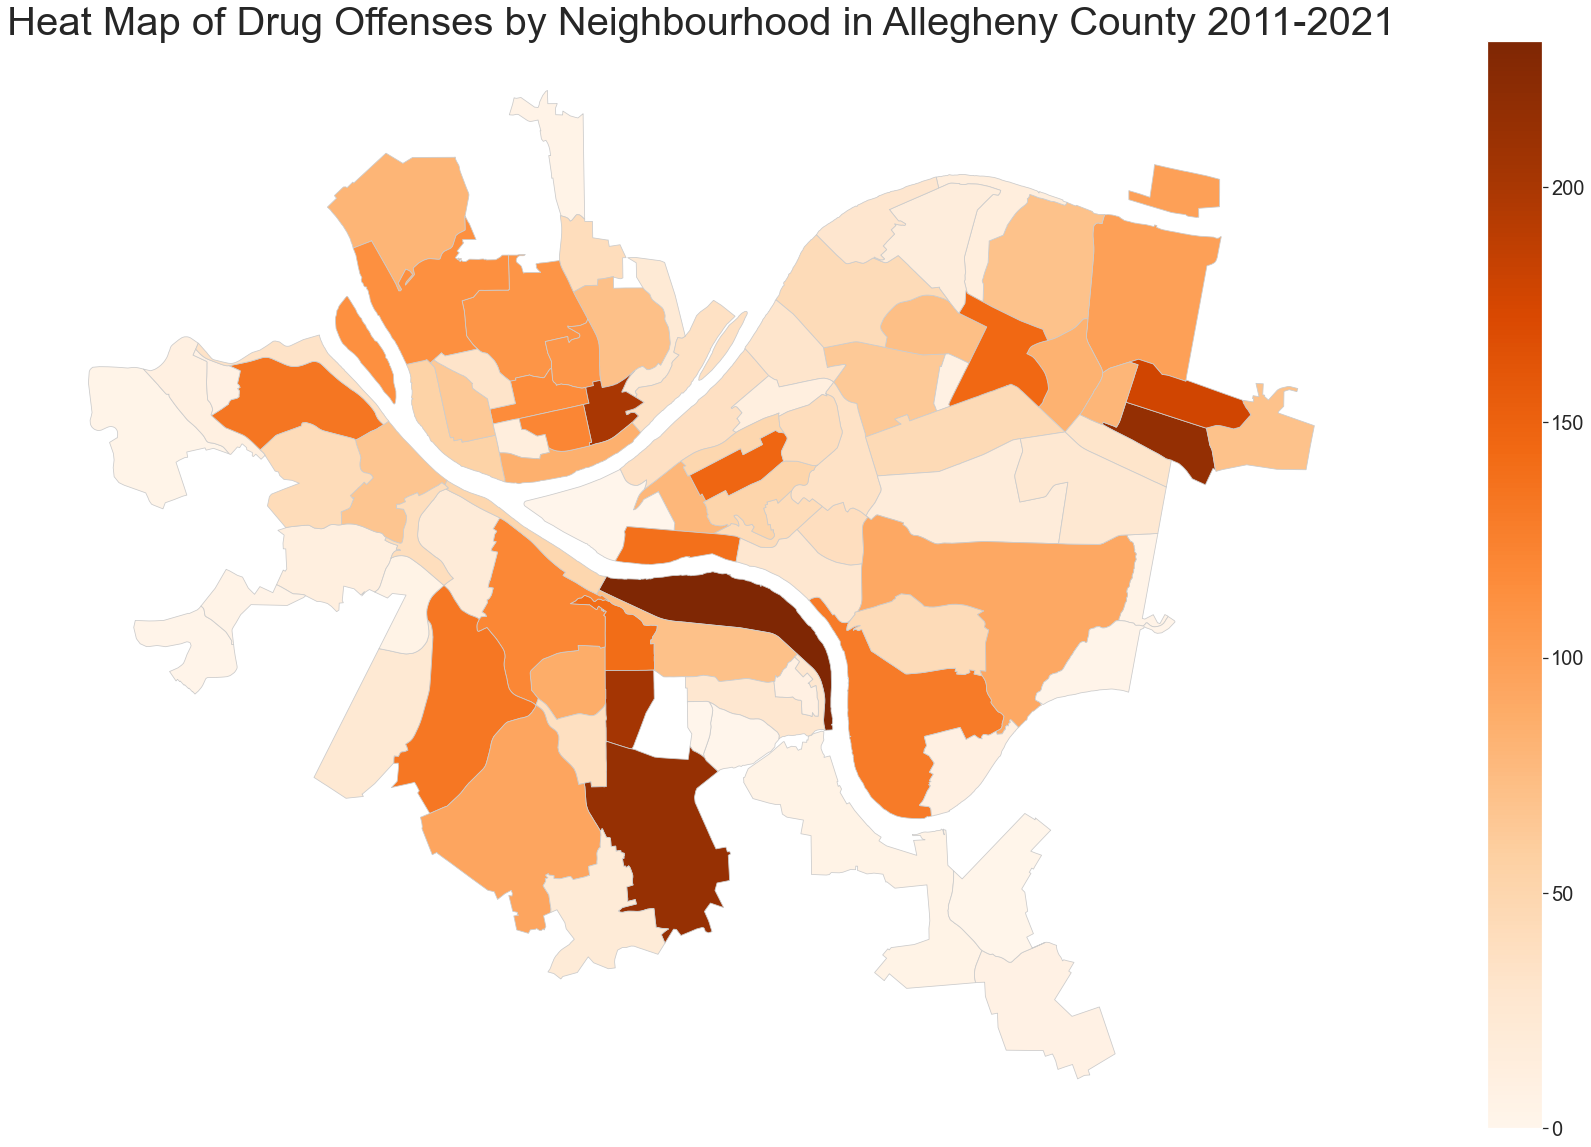

<Figure size 432x288 with 0 Axes>

In [306]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Drug Offenses by Neighbourhood in Allegheny County 2011-2021', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

plt.figure()
plot = regions.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
fig = plot.get_figure()
fig.savefig("Arrests.png", dpi=fig.dpi)
